In [1]:
import utility
import ApexPhaze
import os 

current_directory= os.getcwd()
current_directory = r"{}".format(current_directory)

#cnfg= ApexPhaZe.ConfigReader()
#cnfg.load_config(current_directory+ '\\LensConfiguration.json')

Using default configuration file path.


C:\Program Files\Lumerical\v242\api\python\lumapi.py:895: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


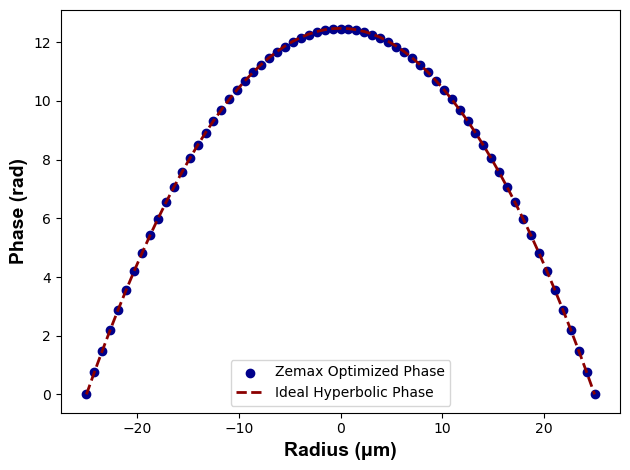

In [2]:
pd= ApexPhaze.PhaseDesign()
radius_zemax, phase_zemax= pd.load_optimized_phase(file_path=current_directory+ '\\optimized_phase_d50_fl100.txt')
pd.compare_optimized_ideal()

  0%|          | 0/11 [00:00<?, ?it/s]

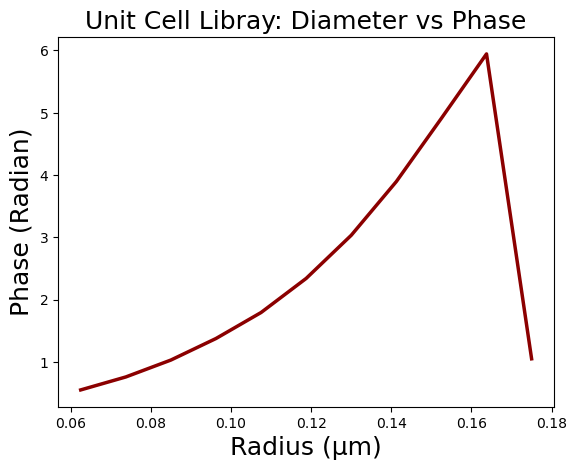

In [3]:
uc= ApexPhaze.UnitCellDesign()
radius_unitcell,phase_unitcell,_= uc.create_unit_cell_library(show_plot=True)
#print(phase_unitcell)

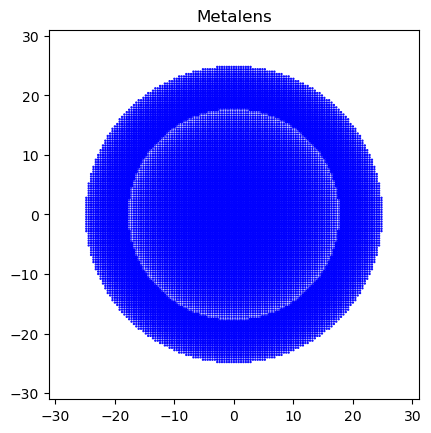

In [4]:
ld= ApexPhaze.LensDesign()
x,y,radius= ld.make_lens_geometry(radius_zemax, phase_zemax, radius_unitcell, phase_unitcell, show_lens= True, idealphase= True)

normalized power through surface near the metalens (using direct transmission): 0.625850867639791
normalized power through surface near the metalens (by using Poynting vector): 0.6258494381080879
Focal Length: 94.3131313131313 μm, 
              
FWHM: -2.9808897984452583 μm, 
              
Overall Efficiency:0.0, 
              
Focusing Efficiency: 0.0, 
              
Transmission Efficiency: 0.625850867639791,
              
TotalPower through focal plane/ source power: 0.6041159599496556


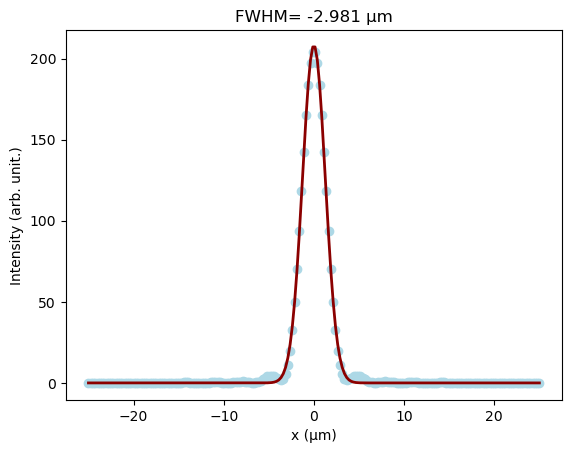

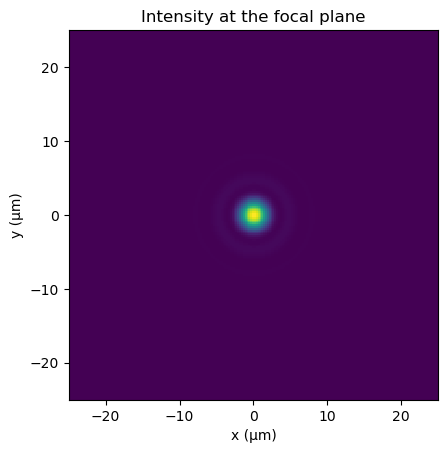

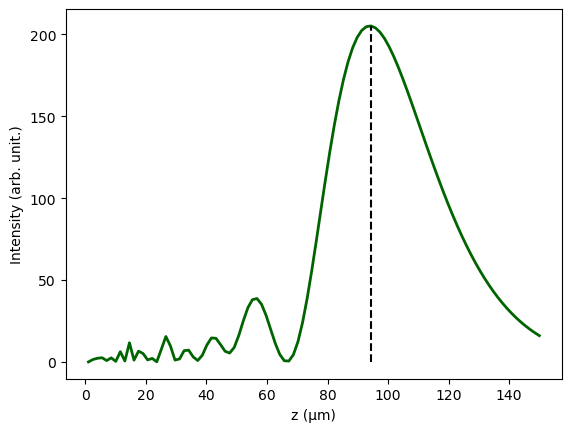

In [5]:
fulllens= ApexPhaze.FullLensSim()
fulllens.run_fdtd(x,y,radius)


In [ ]:
fulllens.get_result_fdtd(show_plot=True)